In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scapy.all import rdpcap, PcapReader
from tqdm import tqdm

In [2]:
def plot_packet_frequency(pcap_file, bin_size=10):
    packets = rdpcap(pcap_file)
    timestamps = np.array([pkt.time for pkt in packets])  # Extract timestamps
    
    # Normalize timestamps relative to the first packet
    timestamps -= timestamps.min()

    # Create histogram bins
    bins = np.arange(0, timestamps.max() + bin_size, bin_size)
    counts, edges = np.histogram(timestamps, bins=bins)

    # Plot the histogram
    plt.figure(figsize=(10, 5))
    plt.bar(edges[:-1], counts, width=bin_size, align='edge', edgecolor='black')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Number of Packets')
    plt.title(f'Packet Frequency (bin size = {bin_size}s)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


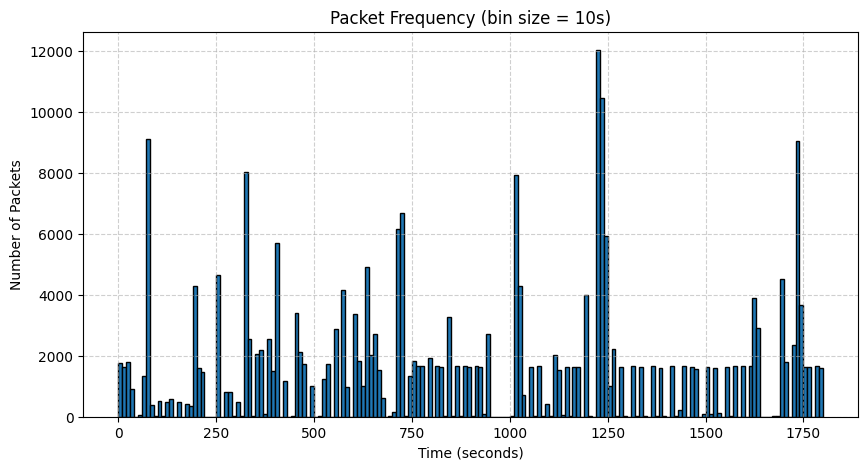

In [5]:

# Run the function on your pcap file
pcap_file = "/Users/Patron/tiktok_solo_dist_30.pcap"
plot_packet_frequency(pcap_file)

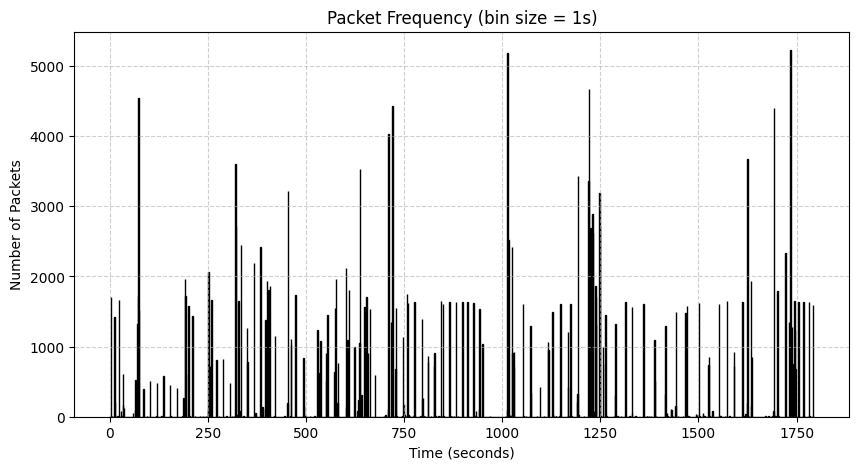

In [7]:
plot_packet_frequency(pcap_file,bin_size=1)

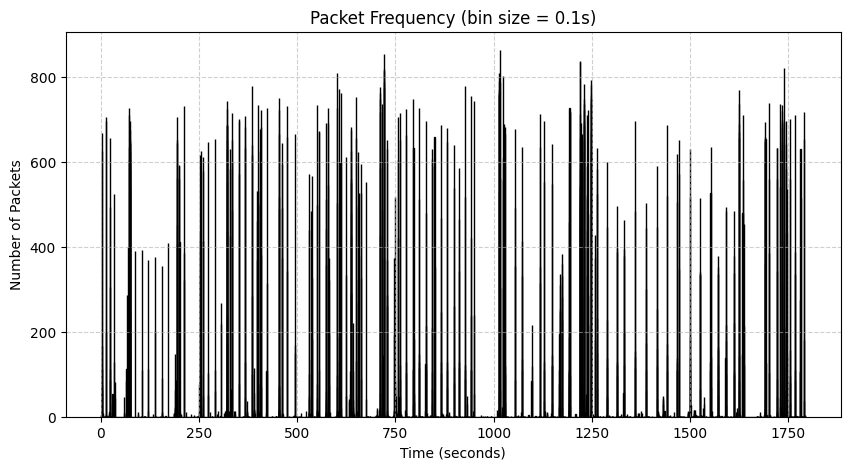

In [9]:
plot_packet_frequency(pcap_file,bin_size=0.1)

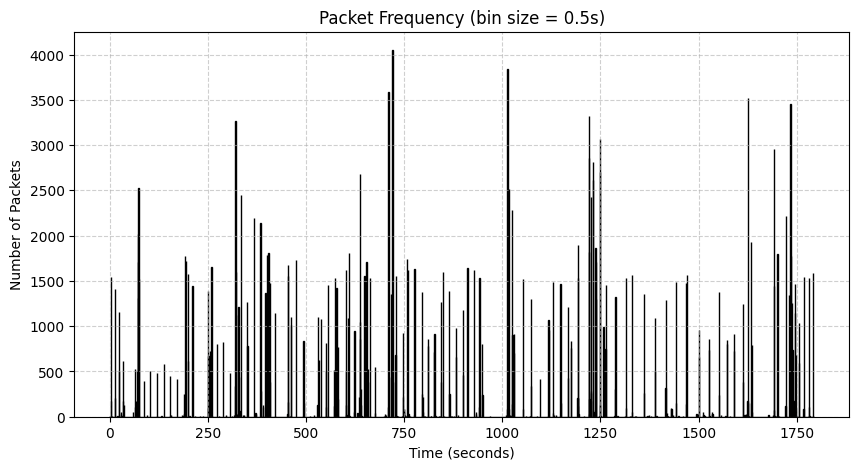

In [11]:
plot_packet_frequency(pcap_file,bin_size=0.5)

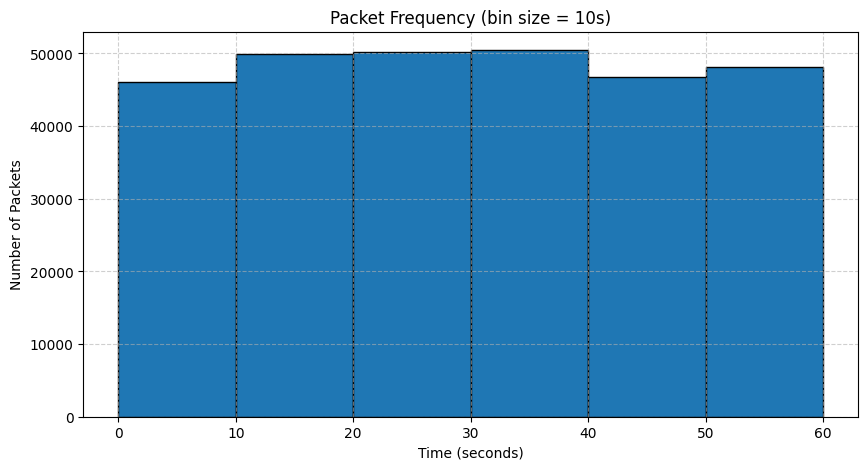

In [5]:
plot_packet_frequency("/Users/Patron/guardian_split/60secs_00000_20250419131036.pcap")

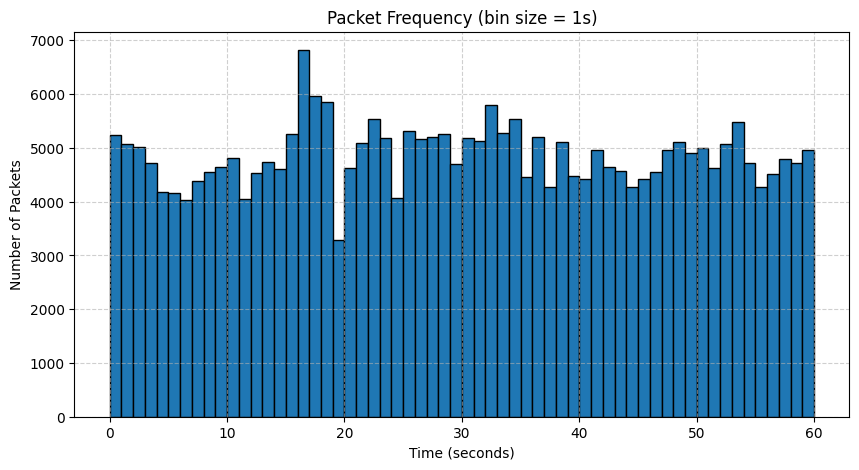

In [7]:
plot_packet_frequency("/Users/Patron/guardian_split/60secs_00000_20250419131036.pcap",bin_size=1)

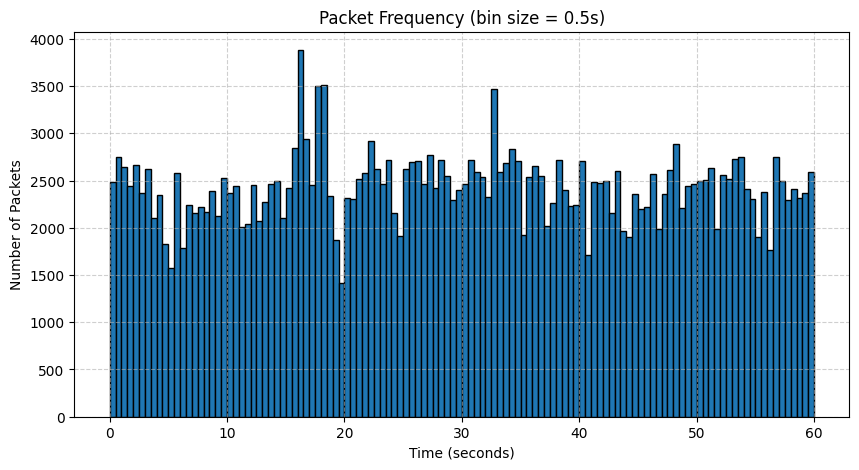

In [9]:
plot_packet_frequency("/Users/Patron/guardian_split/60secs_00000_20250419131036.pcap",bin_size=0.5)

In [17]:

def plot_byte_frequency(pcap_file, bin_size=0.10):  # bin size in seconds
    packets = rdpcap(pcap_file)
    
    # Get timestamps and byte sizes
    timestamps = np.array([pkt.time for pkt in packets])
    sizes = np.array([len(pkt) for pkt in packets])  # total bytes per packet
    
    # Normalize timestamps
    timestamps -= timestamps.min()

    # Bin edges
    bins = np.arange(0, timestamps.max() + bin_size, bin_size)

    # Bin the bytes per bin (use np.histogram with weights)
    byte_sums, _ = np.histogram(timestamps, bins=bins, weights=sizes)

    # Plot time series
    plt.figure(figsize=(10, 4))
    plt.plot(byte_sums, marker='o', linestyle='-')
    plt.title(f'Bytes per {bin_size*1000:.0f}ms Bin')
    plt.xlabel('Time Bin Index')
    plt.ylabel('Total Bytes')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


In [26]:

def plot_packet_frequency_with_progress(pcap_file, bin_size=10):
    timestamps = []

    # Use PcapReader (streaming) instead of rdpcap (loads all at once)
    with PcapReader(pcap_file) as pcap:
        for pkt in tqdm.tqdm(pcap):
            timestamps.append(pkt.time)

    timestamps = np.array(timestamps)
    timestamps -= timestamps.min()

    bins = np.arange(0, timestamps.max() + bin_size, bin_size)
    counts, edges = np.histogram(timestamps, bins=bins)

    plt.figure(figsize=(10, 5))
    plt.bar(edges[:-1], counts, width=bin_size, align='edge', edgecolor='black')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Number of Packets')
    plt.title(f'Packet Frequency (bin size = {bin_size}s)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


3407700it [10:48, 5251.99it/s] 


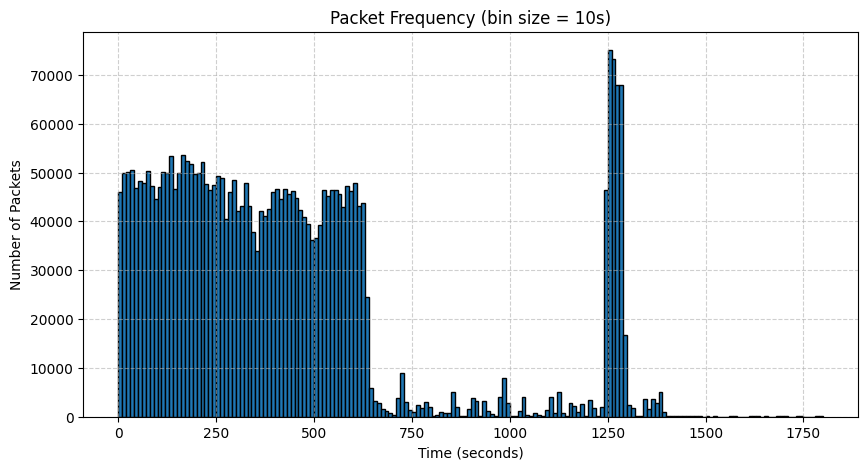

In [28]:
plot_packet_frequency_with_progress("/Users/Patron/guardian_solo_dist_30.pcap", bin_size=10)